# Homework 1

by Masha Golubeva

### 1st Task
**1)** Choose a long text (a novel), do preprocessing on it (delete punctuation, lemmatize it, make sure that every sentence starts on a new line), don't forget to put the lemmatized text or a link to your lemmatized text into your hw folder

My text is "WELCOME TO THE WORLD, BABY GIRL" by Fannie Flagg, 28286 words

In [43]:
import string
from pymystem3 import Mystem

m = Mystem()

This is the function I used for preprocessing. It takes as input a file with the original text and creates a new document "beautiful.txt", where (hopefully) every sentence is in lower case, lemmatized and starts with a new line, the punctuation is deleted.

In [59]:
def BeautifulTxt(filename):
    with open(filename, "r", encoding="utf-8") as file:
        text=file.read() 

    text_listed=[]
    for i in text.split():
        text_listed.append(i)
        if i.endswith(('.','!','?','...')) and len(i)>2:
            text_listed.append('\n')

    text_lined=' '.join(text_listed)

    punct = string.punctuation+'–'+'«'+'»'+'…'
    text_stripped=[]
    for l in text_lined.split('\n'):
        line=''
        for word in l.split():
            line=line+word.strip(punct)+' '
        text_stripped.append(line)
    
    text_lemmas=''
    for l in text_stripped:
        text_lemmas+=''.join(m.lemmatize(l)) 
    


    with open("beautiful.txt", "w",encoding='utf-8') as file:
        file.write(text_lemmas)
  
    
    return(file)

### 2nd Task
**2)** Train a word2vec model on the chosen text, set the parameters (window size, vector size, number of iterations etc.), comment on your choice of parameter settings and the reasoning behind it, experiment with the settings and show me that you have chosen the settings after some experimentation and consideration

In [1]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
f = 'beautiful.txt'
data = gensim.models.word2vec.LineSentence(f)

In [4]:
%time final_model = gensim.models.Word2Vec(data, vector_size=300, window=6, min_count=2, epochs = 10000)

2021-09-24 10:51:52,500 : INFO : collecting all words and their counts
2021-09-24 10:51:52,512 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-24 10:51:52,524 : INFO : collected 4848 word types from a corpus of 28262 raw words and 2841 sentences
2021-09-24 10:51:52,525 : INFO : Creating a fresh vocabulary
2021-09-24 10:51:52,532 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 2330 unique words (48.06105610561056%% of original 4848, drops 2518)', 'datetime': '2021-09-24T10:51:52.532460', 'gensim': '4.1.0', 'python': '3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19042-SP0', 'event': 'prepare_vocab'}
2021-09-24 10:51:52,533 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 25744 word corpus (91.09051022574482%% of original 28262, drops 2518)', 'datetime': '2021-09-24T10:51:52.533460', 'gensim': '4.1.0', 'python': '3.9.6 (tags/v3.9.6:db3ff76, Ju

Wall time: 5min 50s


In [5]:
final_model.init_sims(replace=True)
model_path = "beautiful.bin"

print("Saving model...")
final_model.wv.save_word2vec_format(model_path, binary=True)

2021-09-24 10:59:49,649 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-09-24 10:59:49,652 : INFO : storing 2330x300 projection weights into beautiful.bin


Saving model...


#### The Choice of the Parameters
As far as I understood, the parameters are chosen the following way.

**Data:** size of the corpus, of course it is better to have a large one, but this is my independent variable, I'm not able to change it \
**Vector size:** the larger = the better, but there is no point in making it more than 300, because no better results are found. (but sometimes the larger != the better, it depends on the corpus) \
**Window:** it depends on the text, for syntax the optimal size is 4, for semantics - 8-10. Also, it may depend on the chosen learning algorithm \
**Min_count:** no idea, but let's not take single occurances into account \
**Epochs:** as I understood, there is absolutely no restriction on the number of epochs, so more epochs = better model 

I choose the number of epochs of 10000, min_count of 2

#### Tests

Some tests on window and vector size are presented below (sorry, I didn't understand how can I "hide" the cells)

Test results for vector_size=300, window=10, min_count=2, epochs = 10000

In [18]:
my_model.wv.most_similar(positive=["работа"], topn=3)

[('поглазеть', 0.3089338541030884),
 ('похожий', 0.2570164203643799),
 ('явно', 0.24802929162979126)]

In [19]:
my_model.wv.most_similar(positive=["друг"], topn=3)

[('фото', 0.2849806547164917),
 ('гадкий', 0.2615336775779724),
 ('род', 0.24512581527233124)]

In [20]:
my_model.wv.most_similar(positive=["добрый"], topn=3)

[('семейство', 0.2977628707885742),
 ('ага', 0.2570479214191437),
 ('возненавидеть', 0.2566930949687958)]

In [21]:
my_model.wv.similarity("он","она")

0.53631204

In [22]:
my_model.wv.doesnt_match("зеленый красный добрый желтый".split())

'добрый'

In [23]:
my_model.wv.similarity("красный","зеленый")

0.020323033

In [24]:
my_model.wv.similarity("красный","добрый")

-0.024288919

In [26]:
my_model.wv.similarity("красный","желтый")

0.014774105

Test for vector_size=300, window=10, min_count=2, epochs = 10000, sg=1

In [29]:
my_model1.wv.most_similar(positive=["работа"], topn=3)

[('телестудия', 0.2888698875904083),
 ('переходить', 0.2798248529434204),
 ('какой-нибудь', 0.2732676565647125)]

In [30]:
my_model1.wv.most_similar(positive=["друг"], topn=3)

[('замужем', 0.34062671661376953),
 ('познакомиться', 0.31783944368362427),
 ('двенадцатилетний', 0.3117828071117401)]

In [32]:
my_model1.wv.similarity("он","она")

0.08120457

In [33]:
my_model1.wv.doesnt_match("зеленый красный добрый желтый".split())

'добрый'

Test for vector_size=300, window=6, min_count=2, epochs = 10000

In [6]:
my_model2.wv.most_similar(positive=["работа"], topn=3)

[('поглазеть', 0.3380540609359741),
 ('похожий', 0.2670522928237915),
 ('чей-нибудь', 0.25697770714759827)]

In [7]:
my_model2.wv.most_similar(positive=["друг"], topn=3)

[('род', 0.24013884365558624),
 ('гостиная', 0.2280181646347046),
 ('наставать', 0.22362621128559113)]

In [9]:
my_model2.wv.most_similar(positive=["добрый"], topn=3)

[('майкл', 0.2716999053955078),
 ('возненавидеть', 0.2622759938240051),
 ('признавать', 0.24430441856384277)]

In [10]:
my_model2.wv.similarity("он","она")

0.5776451

In [11]:
my_model2.wv.doesnt_match("зеленый красный добрый желтый".split())

'добрый'

In [13]:
my_model2.wv.similarity("красный","зеленый")

-0.032736234

In [14]:
my_model2.wv.similarity("красный","добрый")

0.008608189

Test for vector_size=300, window=3, min_count=2, epochs = 10000

In [17]:
my_model3.wv.most_similar(positive=["работа"], topn=3)

[('цель', 0.31592559814453125),
 ('включать', 0.2938983738422394),
 ('напыщенный', 0.27142733335494995)]

In [18]:
my_model3.wv.most_similar(positive=["друг"], topn=3)

[('притворяться', 0.2522941529750824),
 ('снимать', 0.24962781369686127),
 ('стакан', 0.2488526552915573)]

In [19]:
my_model3.wv.most_similar(positive=["добрый"], topn=3)

[('проклятый', 0.30721378326416016),
 ('дура', 0.30688270926475525),
 ('душа', 0.28089264035224915)]

In [38]:
my_model3.wv.similarity("он","она")

0.57154065

In [28]:
my_model3.wv.doesnt_match("зеленый красный добрый желтый".split())

'добрый'

In [29]:
my_model3.wv.similarity("красный","зеленый")

0.047857594

In [30]:
my_model3.wv.similarity("красный","добрый")

0.04666189

Test for vector_size=200, window=6, min_count=2, epochs = 10000

In [35]:
my_model4.wv.most_similar(positive=["работа"], topn=3)

[('поглазеть', 0.29116296768188477),
 ('речь', 0.24026396870613098),
 ('чей-нибудь', 0.23903293907642365)]

In [36]:
my_model4.wv.most_similar(positive=["друг"], topn=3)

[('род', 0.23626351356506348),
 ('имя', 0.2257774919271469),
 ('наставать', 0.22429770231246948)]

In [37]:
my_model4.wv.most_similar(positive=["добрый"], topn=3)

[('сюрприз', 0.2668023705482483),
 ('возненавидеть', 0.2631329298019409),
 ('на', 0.2457609474658966)]

In [31]:
my_model4.wv.similarity("он","она")

0.48514235

In [32]:
my_model4.wv.doesnt_match("зеленый красный добрый желтый".split())

'добрый'

In [33]:
my_model4.wv.similarity("красный","зеленый")

0.012993248

In [34]:
my_model4.wv.similarity("красный","добрый")

0.06259161

#### **Conclusion**

Small vectors are bad. \
Window size of 6 is better, than the one of 10 or 3 (according to the similarities between adjectives) \
Similarity tests always demonstrate something illogical, no variation here (even the POS doesn't match)

#### My final choice of parameters: 
vector_size=300, window=6, min_count=2, epochs = 10000

### 3rd Task
**3)** Test your model, use most_similar, similarity, doesnt_match functions, comment on the model performance, explain the reasoning behind the testing

Now I will test the model on some more data to find out what it is able to do \
Actually, the model is not really working, because it was trained on a very small text. For example, all the top results I get for *most_similar* and *similarity* tests have very small closeness (? близость). The largest one is for 'он/она' I guess and it is only 0,5. \
It's worth saying, that the tests presented below are just a small sample of all the tests I made, the most successful ones. It's just not so interesting to observe the innumerable unsuccessful attempts

The two tests below are beautiful and even seem logic. (The top-2 result for *+he -man* is *I* which is cool, because the main character of the novel is a girl. Probably, it is reflected also in the results of *+she -woman* test, where top-2 is different)

In [21]:
final_model.wv.most_similar(positive=['он'], negative=['мужчина'], topn=3)

[('она', 0.3883962631225586),
 ('я', 0.346786230802536),
 ('они', 0.3339729905128479)]

In [26]:
final_model.wv.most_similar(positive=['она'], negative=['женщина'], topn=3)

[('он', 0.3949689269065857),
 ('вы', 0.3770924210548401),
 ('ты', 0.3659365773200989)]

Unfortunately, it doesn't work invertedly :(

In [24]:
final_model.wv.most_similar(positive=['мужчина'], negative=['он'], topn=3)

[('столь', 0.32201576232910156),
 ('выталкивать', 0.28553855419158936),
 ('помолчать', 0.27636614441871643)]

In [25]:
final_model.wv.most_similar(positive=['женщина'], negative=['она'], topn=3)

[('темный', 0.27956831455230713),
 ('игнорировать', 0.2628071904182434),
 ('расстраивать', 0.24779987335205078)]

This test shows the similarity between two pronouns *he* *she*. It is not very high ($0.58), but compared to all the other similarities produced by my model this one is the highest, which is actually expected and logical 

In [22]:
final_model.wv.similarity('она', 'он')

0.58987194

The results of three tests below show, that *I* is more alike to *she* than to *he*, which can also be explained (maybe...) by the fact that the main character is a girl 

In [27]:
final_model.wv.similarity('она', 'я')

0.5575203

In [28]:
final_model.wv.similarity('он', 'я')

0.47519016

In [33]:
final_model.wv.words_closer_than('я', 'он')

['она']

Here is another funny test: I found out, that the name of the main character is sometimes lemmatized as *дена* and sometimes as *ден*. The similarity between them is very small, which is strange. However, as we can see in the following tests, *дена* seems to be rare, according to our model the main charachter is called *ден* (and it's her)

In [56]:
final_model.wv.similarity('дена', 'ден')

0.009007221

In [57]:
final_model.wv.most_similar(positive=['дена'], topn=3)

[('подросток', 0.422659307718277),
 ('начес', 0.3590726852416992),
 ('стекло', 0.35288578271865845)]

In [58]:
final_model.wv.most_similar(positive=['ден'], topn=3)

[('она', 0.40499091148376465),
 ('они', 0.3513137698173523),
 ('я', 0.3283940851688385)]

In the next test I check if the model can distinguish semantically related words. For example, in the first test I input 3 character names and one toponym, which the model extracts correctly (*мэкка* is a character name too, not a toponym. Actually, it's lemmatized *мэкки*)\
The same situation is in the second test: the model extracts a character name from a list of toponyms (I tried several names and it always works)

In [77]:
final_model.wv.doesnt_match('мэкка норма элмвуд-спрингс ден'.split())

'элмвуд-спрингс'

In [74]:
final_model.wv.doesnt_match('нью-йорк элмвуд-спрингс ден алабама'.split())

'ден'

Here below I input a list of character names where the most of them live in one small town and just one lives in another town, they never meet. The model distinguishes it correctly 

In [85]:
final_model.wv.doesnt_match('мэкка норма элнер дороти сьюк'.split())

'сьюк'

Although, if we replace this unique character by another unique character, who is the main one and interacts with them (not all of the time), but lives in another place, the model is not able to understand it 

In [87]:
final_model.wv.doesnt_match('мэкка норма элнер дороти ден'.split())

'норма'

### 4th Task (+ LSI experiments)
**4)** Visualize the results of the training and testing (one plot or one graph), comment on the visualization

Now we will apply the PCA and watch the same words visualized on the plot: 3 toponyms, 4 character names, which could be also divided by the hometown  

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
m='beautiful.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)

2021-09-24 15:37:19,337 : INFO : loading projection weights from beautiful.bin
2021-09-24 15:37:19,381 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (2330, 300) matrix of type float32 from beautiful.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2021-09-24T15:37:19.381661', 'gensim': '4.1.0', 'python': '3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19042-SP0', 'event': 'load_word2vec_format'}


Here is a PCA model trained on the given set of words. On the plot we can see a claster of 3 toponyms, while all the character names are on the left side. The 2 inhabitants of one town are very close to each other ("мэкка" and "элнер"), while the third of them ("норма") is for some reason much higher (maybe it is caused by the homonymy of her name and a word with meaning 'norm, standard', although I don't remember that there were many of such instances in the text). The name of the main character is also presented separately

In [91]:
words1 = ['нью-йорк', 'элмвуд-спрингс', 'ден', 'алабама','мэкка','норма', 'элнер']
X = model[words1]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

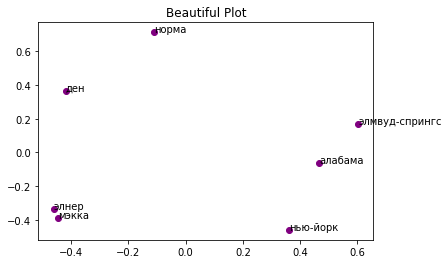

In [92]:
plt.scatter(coords[:, 0], coords[:, 1], color='purple')
plt.title('Beautiful Plot')

for i, word in enumerate(words1):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

Here is my attempt to use another method of dimension reduction - LSI. When LSI model is trained on a given list of words, it shows the same distinction between toponyms and character names, though the names are clastered differently, and I have no idea how it could be explained 

In [100]:
from sklearn.decomposition import TruncatedSVD, PCA
from matplotlib import style

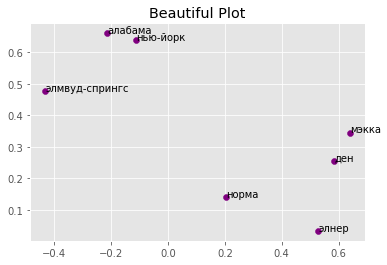

In [99]:
svd = TruncatedSVD(n_components=2)
coords = svd.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='purple')
plt.title('Beautiful Plot')

for i, word in enumerate(words1):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

If we use a PCA model trained on the whole vocabulary of our corpus, the visualization is even less illustrative. Although, we can say, that the toponyms are situated somewhat higher than the character names, 'элнер' and 'мэкка' are again close to each other, and for some reason 'ден' is very close to 'норма'

In [101]:
vocab=[]
i=0
while i<len(final_model.wv):
    vocab.append(final_model.wv.index_to_key[i])
    i+=1

In [102]:
pca = PCA(n_components=2)
pca.fit(model[vocab])
coords = pca.transform(model[words1])

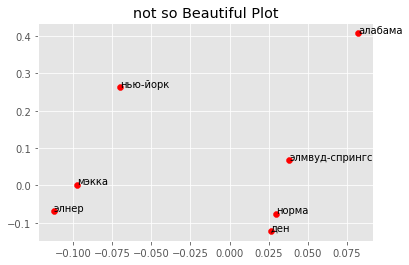

In [103]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('not so Beautiful Plot')

for i, word in enumerate(words1):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

(if I applied the LSI method correctly) Two models with different dimension reduction methods (PCA and LSI) trained on the whole vocabulary of our corpus demonstrate very identical results (unfortunately, I don't know how to draw them both on the same plot). Although they have different scales, the mutual alignment of the words is the same.

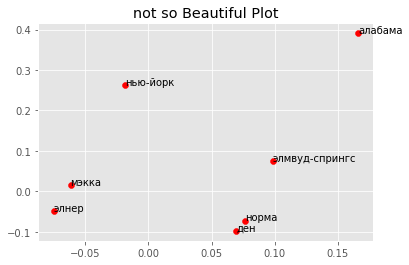

In [107]:
svd = TruncatedSVD(n_components=2)
svd.fit(model[vocab])
coords = svd.transform(model[words1])

plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('not so Beautiful Plot')

for i, word in enumerate(words1):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

If we add more words to the list, the result of the PCA model is less and less meaningful, but it seems like the distinction between toponyms and character names is always present!

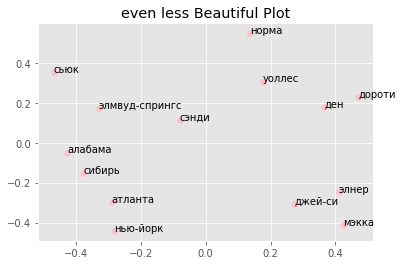

In [116]:
words2 = ['нью-йорк', 'элмвуд-спрингс', 'ден', 'алабама', "атланта",'мэкка','норма', 'элнер', 
         'сьюк','дороти', "уоллес",'джей-си', "сэнди",'сибирь']
X = model[words2]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='pink')
plt.title('even less Beautiful Plot')

for i, word in enumerate(words2):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

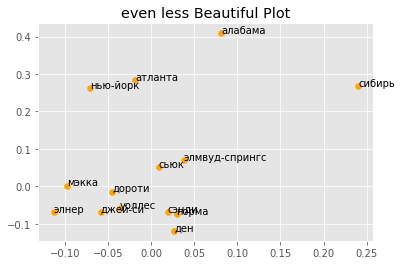

In [112]:
pca = PCA(n_components=2)
pca.fit(model[vocab])
coords = pca.transform(model[words2])

plt.scatter(coords[:, 0], coords[:, 1], color='orange')
plt.title('even less Beautiful Plot')

for i, word in enumerate(words2):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

The LSI model trained on the given list shows a bit better result than the analogous PCA model, but the if it is trained on the whole vocabulary, it is again very similar to the PCA model. 

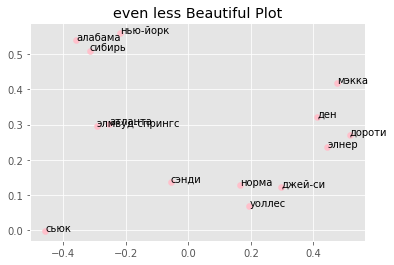

In [113]:
svd = TruncatedSVD(n_components=2)
coords = svd.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='pink')
plt.title('even less Beautiful Plot')

for i, word in enumerate(words2):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

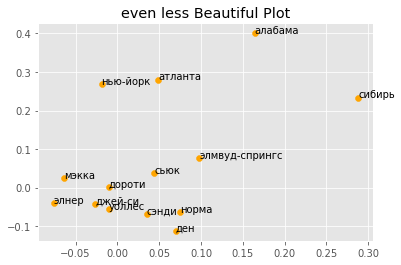

In [118]:
svd = TruncatedSVD(n_components=2)
svd.fit(model[vocab])
coords = svd.transform(model[words2])

plt.scatter(coords[:, 0], coords[:, 1], color='orange')
plt.title('even less Beautiful Plot')

for i, word in enumerate(words2):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

### 5th Task
**5)** Choose two sentences from the original text and substitute all the meaningful words with their closest neighbours from your word2vec model, do the agreement on the sentences with substitutions

In [7]:
with open('beautiful.txt', "r", encoding="utf-8") as file:
        text=file.read()
sentences = text.split('\n')

First, I pick up 2 random sentences (which are more than 10 words long)

In [62]:
import random
while True:
    sent1 = sentences[random.randrange(len(sentences))]
    if len(sent1.split()) < 10:
        continue
    else:
        while True:
            sent2 = sentences[random.randrange(len(sentences))]
            if sent1 == sent2 or len(sent2.split()) < 10 :
                continue
            else:
                break
        break
print(sent1, '\n', sent2)

 да мэкка все правильно но быть вероятность что старый шерстяной покрывало который двадцать год показываться она не столько домашний сколько просто жалкий  
 в элмвуд-спрингс да и во весь округа не находиться бы ребенок не получать на свой день рождение розовый с белый верх кекс в форма цирк с каруселька на верхушка 


#### Substitution

Then I substitute all the words by their closest neighbours. If a word is not in the vocabulary of my model, it doesn't change\
Frankly speaking, as a human I am not really able to make a somewhat meaningful agreement on the output sentences

In [151]:
print(sent1, '\n')
new_sent1 = ''
for w in sent1.split():
    if w in vocab:
        new_sent1+=final_model.wv.most_similar(positive=[w], topn=1)[0][0]
    else:
        new_sent1+=w
    new_sent1+=' '
print(new_sent1)

 да мэкка все правильно но быть вероятность что старый шерстяной покрывало который двадцать год показываться она не столько домашний сколько просто жалкий  

не затем ты пожелать что не шерстяной как выдавливать вероятность постилать телевизор тридцать минута передавать он я понадобиться полно многий позволять жалкий 


In [152]:
print(sent2, '\n')
new_sent2 = ''
for w in sent2.split():
    if w in vocab:
        new_sent2+=final_model.wv.most_similar(positive=[w], topn=1)[0][0]
    else:
        new_sent2+=w
    new_sent2+=' '
print(new_sent2)

в элмвуд-спрингс да и во весь округа не находиться бы ребенок не получать на свой день рождение розовый с белый верх кекс в форма цирк с каруселька на верхушка  

на выдавливать не не менее муха выдумывать я фото с бабушка я подрать в прогуливаться зеленый лето яйцо знать люстра аппарат кленовый на жидкий цирк знать каруселька в ура 


In [10]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

2021-09-24 11:01:16,072 : INFO : Loading dictionaries from c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pymorphy2_dicts_ru\data
2021-09-24 11:01:16,226 : INFO : format: 2.4, revision: 417127, updated: 2020-10-11T15:05:51.070345


#### Unsuccessful automatic agreement (actually, this part can be skipped)

Here is my attempt to write a function, which would do the agreement (at least some part of it) automatically. I assume, it would work better on the original lemmatized sentences. On the sentences with substitutions it demonstrates poor results

In [56]:
def Agreement(new_sent): 
    parsed_newsent=[]
    for w in new_sent.split():
        parsed_newsent.append(morph.parse(w)[0])
    
    agreed=''
    i=1
    erstes = parsed_newsent[0]
    while i < len(parsed_newsent):
        zweites = parsed_newsent[i]
        if str(erstes.tag.POS)=='VERB':
            if str(zweites.tag.POS)=='INFN':
                zweites=zweites.inflect({str(erstes.tag.number), str(erstes.tag.case), str(erstes.tag.person)})
        elif str(erstes.tag.POS)=='NOUN': 
            if str(zweites.tag.POS)=='INFN':
                if str(erstes.tag.case)=='nomn':
                    if str(erstes.tag.number)=='sing':
                        zweites=zweites.inflect({'indc','3per', 'sing'})
            elif str(zweites.tag.POS)=='NOUN':
                if str(erstes.tag.case)=='nomn':
                    zweites=zweites.inflect({'gent', 'sing'})
        elif str(erstes.tag.POS)=='NPRO':
            if str(zweites.tag.POS)=='INFN':
                if str(erstes.tag.case)=='nomn':
                    zweites=zweites.inflect({str(erstes.tag.number),str(erstes.tag.person)})
        elif str(erstes.tag.POS)=='PREP':
            if str(zweites.tag.POS)=='NOUN' or str(zweites.tag.POS)=='NPRO':
                if str(erstes.word) == 'к':
                    zweites=zweites.inflect({'datv'}) 
        elif str(erstes.tag.POS)=='VERB':
            if str(erstes.tag.transitivity)=='tran':
                if str(zweites.tag.POS)=='NOUN' or str(zweites.tag.POS)=='NPRO' or str(zweites.tag.POS)=='ADJF':
                    zweites=zweites.inflect({'accs'})
        elif str(erstes.tag.POS)=='ADJF':
            if str(zweites.tag.POS)=='NOUN' or str(zweites.tag.POS)=='NPRO' or str(zweites.tag.POS)=='ADJF':
                zweites=zweites.inflect({str(erstes.tag.case)})
        agreed+=erstes.word+' '
        erstes=zweites
        i+=1
    agreed+=zweites.word

    return(new_sent, agreed)

In [60]:
Agreement(new_sent1)

('это как на словно выгода говорить она расслабляться он бобби что чертов это притворяться он сказать как ханжа это знать ',
 'это как на словно выгода говорит она расслабляется он бобби что чертов это притворяться он скажет как ханжа это знать')

In [61]:
Agreement(new_sent2)

('фонд не подрать на телевидение но десять год гадкий хрен не проходить постучать он сенатор похоже на пользоваться клиент могущественный уильям моррис выжимать погода число уорд не наиболее могущественный здание ',
 'фонд не подрать на телевидение но десять год гадкий хрен не проходить постучать он сенатор похоже на пользоваться клиент могущественный уильям морриса выжимать погода числа уорд не наиболее могущественный здание')

Maybe I could take this idea of an automatic ageement maker as a final project of the course. I don't think it is possible to make it work good just using the conditions. But maybe it is possible to apply the syntactic parsing here or to connect it to some big corpus (or to write more conditions :) ) \
This is just an idea yet

#### Agreement

Here below I make the agreement myself on two particular sentences 

In [155]:
firstsent=new_sent1    #I make this numerous NeW_nAmEs only to separate the randomly picked sentences, which can de 
secondsent=new_sent2   #different every time we run the code, from the particular sentences, in which I will make the agreement 
print(firstsent) 
print(secondsent)
parsed_firstsent=[]
for w in firstsent.split():
    parsed_firstsent.append(morph.parse(w)[0])
parsed_secondsent=[]
for w in secondsent.split():
    parsed_secondsent.append(morph.parse(w)[0])

не затем ты пожелать что не шерстяной как выдавливать вероятность постилать телевизор тридцать минута передавать он я понадобиться полно многий позволять жалкий 
на выдавливать не не менее муха выдумывать я фото с бабушка я подрать в прогуливаться зеленый лето яйцо знать люстра аппарат кленовый на жидкий цирк знать каруселька в ура 


This is a function, that helps to make the agreement. It takes as input a list with parsed words, offers the user to input the required grammemes for each word and returns a tuple, which contains a list of parsed agreed words (in order that it would be possible to correct if smth is wrong with the agreement) and an agreed sentence as a string 

In [156]:
def Inflection(parsed):
    agreed=[]
    str_agreed=''
    for i in parsed:
        print(i.word)
        grammemes = input('Grammemes for inflection WITHOUT COMMAS: ')
        if grammemes=='':
            word=i
        else:
            word = i.inflect(set(grammemes.split()))
        agreed.append(word)
        str_agreed+=word.word+' '
    return(agreed, str_agreed)

In [158]:
agreed1 = Inflection(parsed_firstsent)

не
Grammemes for inflection WITHOUT COMMAS: 
затем
Grammemes for inflection WITHOUT COMMAS: 
ты
Grammemes for inflection WITHOUT COMMAS: 
пожелать
Grammemes for inflection WITHOUT COMMAS: past masc indc
что
Grammemes for inflection WITHOUT COMMAS: 
не
Grammemes for inflection WITHOUT COMMAS: 
шерстяной
Grammemes for inflection WITHOUT COMMAS: 
как
Grammemes for inflection WITHOUT COMMAS: 
выдавливать
Grammemes for inflection WITHOUT COMMAS: past masc indc
вероятность
Grammemes for inflection WITHOUT COMMAS: 
постилать
Grammemes for inflection WITHOUT COMMAS: 
телевизор
Grammemes for inflection WITHOUT COMMAS: 
тридцать
Grammemes for inflection WITHOUT COMMAS: 
минута
Grammemes for inflection WITHOUT COMMAS: plur gent
передавать
Grammemes for inflection WITHOUT COMMAS: past masc indc
он
Grammemes for inflection WITHOUT COMMAS: 
я
Grammemes for inflection WITHOUT COMMAS: datv
понадобиться
Grammemes for inflection WITHOUT COMMAS: neut PRTF sing
полно
Grammemes for inflection WITHOUT COMMA

In [163]:
agreed2=Inflection(parsed_secondsent)

на
Grammemes for inflection WITHOUT COMMAS: 
выдавливать
Grammemes for inflection WITHOUT COMMAS: PRTF accs masc
не
Grammemes for inflection WITHOUT COMMAS: 
не
Grammemes for inflection WITHOUT COMMAS: 
менее
Grammemes for inflection WITHOUT COMMAS: 
муха
Grammemes for inflection WITHOUT COMMAS: accs
выдумывать
Grammemes for inflection WITHOUT COMMAS: 1per pres indc
я
Grammemes for inflection WITHOUT COMMAS: 
фото
Grammemes for inflection WITHOUT COMMAS: 
с
Grammemes for inflection WITHOUT COMMAS: 
бабушка
Grammemes for inflection WITHOUT COMMAS: ablt
я
Grammemes for inflection WITHOUT COMMAS: datv
подрать
Grammemes for inflection WITHOUT COMMAS: past plur indc
в
Grammemes for inflection WITHOUT COMMAS: 
прогуливаться
Grammemes for inflection WITHOUT COMMAS: PRTF masc loct
зелёный
Grammemes for inflection WITHOUT COMMAS: loct
лето
Grammemes for inflection WITHOUT COMMAS: loct
яйцо
Grammemes for inflection WITHOUT COMMAS: plur
знать
Grammemes for inflection WITHOUT COMMAS: pres indc plu

In [166]:
print(firstsent)
print()
print(agreed1[1])

не затем ты пожелать что не шерстяной как выдавливать вероятность постилать телевизор тридцать минута передавать он я понадобиться полно многий позволять жалкий 

не затем ты пожелал что не шерстяной как выдавливал вероятность постилать телевизор тридцать минут передавал он мне понадобившееся полно многое позволяя жалким 


In [167]:
print(secondsent)
print()
print(agreed2[1])

на выдавливать не не менее муха выдумывать я фото с бабушка я подрать в прогуливаться зеленый лето яйцо знать люстра аппарат кленовый на жидкий цирк знать каруселька в ура 

на выдавливающего не не менее муху выдумываю я фото с бабушкой мне подрали в прогуливающемся зелёном лете яйца знаем люстру аппаратом кленовым на жидкий цирк знаем карусельки в ура 


## The End!! 
Thank you for your attention :)